In [14]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.5
T = 2.0
h = 0.0001
tau = 0.005
x_start, x_end = 0.0, 1.0
Co = a * tau / h**2

#ГУ
a1, b1, c1 = -1, 1, 1
a2, b2, c2 = -np.cos(1), 1 + np.sin(1), np.cos(1)


def f(t, x):
    return 0.5 * np.sin(x) * (3 + t) + 1


def exact_solv(t, x):
    return (t + 1) * np.sin(x) + t

#сетка
M = int((x_end - x_start) / h) + 1
N = int(T / tau) + 1

x = np.linspace(x_start, x_end, M)
t = np.linspace(0, T, N)

u = np.zeros((N, M))
u_exact = np.zeros((N, M))
mistakes = np.zeros((N, M))

#НУ
for i in range(M):
    u[0, i] = np.sin(x[i])
    u_exact[0, i] = exact_solv(0, x[i])
    mistakes[0, i] = abs(u_exact[0, i] - u[0, i])


def progonka(A, d):
    n = len(d)
    alpha = np.zeros(n)
    beta = np.zeros(n)
    x = np.zeros(n)

    alpha[1] = -A[0, 1] / A[0, 0]
    beta[1] = d[0] / A[0, 0]

    for i in range(1, n - 1):
        denom = A[i, i] + A[i, i - 1] * alpha[i]
        alpha[i + 1] = -A[i, i + 1] / denom
        beta[i + 1] = (d[i] - A[i, i - 1] * beta[i]) / denom

    x[-1] = (d[-1] - A[-1, -2] * beta[-1]) / (A[-1, -1] + A[-1, -2] * alpha[-1])

    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]
    return x


def build_matrix(u_prev):
    A = np.zeros((M, M))
    b = np.zeros(M)

    # Левая граница
    A[0, 0] = a1 - b1 / h
    A[0, 1] = b1 / h - b1 / (h * Co)
    b[0] = c1 - 0.5 * b1 * u_prev[0] / h \
           - b1 * (1 - Co) * u_prev[1] / (h * Co) \
           - 0.5 * b1 * u_prev[2] / h \
           - tau * b1 * (f(t[i], x[1]) + f(t[i - 1], x[1])) / (2 * h * Co)

    # Правая граница
    A[M - 1, M - 2] = b2 * (1 - Co) / (h * Co)
    A[M - 1, M - 1] = a2 + b2 / h
    b[M - 1] = c2 + 0.5 * b2 * u_prev[M - 3] / h \
               + b2 * (1 - Co) * u_prev[M - 2] / (h * Co) \
               + 0.5 * b2 * u_prev[M - 1] / h \
               + 0.5 * b2 * tau * (f(t[i], x[M - 2]) + f(t[i - 1], x[M - 2])) / (h * Co)

    # Внутренние точки
    for k in range(1, M - 1):
        A[k, k - 1] = -0.5 * Co
        A[k, k] = Co + 1
        A[k, k + 1] = -0.5 * Co
        b[k] = 0.5 * Co * u_prev[k - 1] + (1 - Co) * u_prev[k] + 0.5 * Co * u_prev[k + 1] \
               + 0.5 * tau * (f(t[i], x[k]) + f(t[i - 1], x[k]))

    return A, b


#Основной цикл
for i in range(1, N):
    A, b = build_matrix(u[i - 1])
    u[i] = progonka(A, b)

    for j in range(0, M):
        u_exact[i, j] = exact_solv(t[i], x[j])
        mistakes[i, j] = (u_exact[i, j] - u[i, j])



# Mistakes = [np.log10(mistakes[400, 1]), np.log10(mistakes[400, 100]), np.log10(mistakes[400, 200]), np.log10(mistakes[400, 500]), np.log10(mistakes[400, 900]), np.log10(mistakes[400, 999])]
# X=[np.log10(x[1]), np.log10(x[100]), np.log10(x[200]), np.log10(x[500]), np.log10(x[900]), np.log10(x[999])]
# order = abs((Mistakes[0]-Mistakes[-1])/(X[0]-X[-1]))


-8.138261858636112 -8.175275820946428 -2.0 0.0
0.018506981155158364


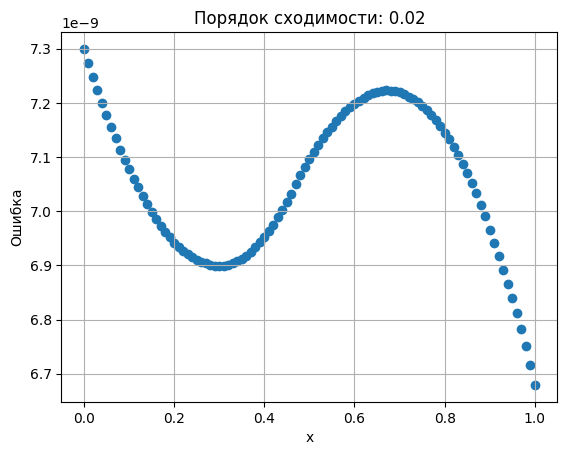

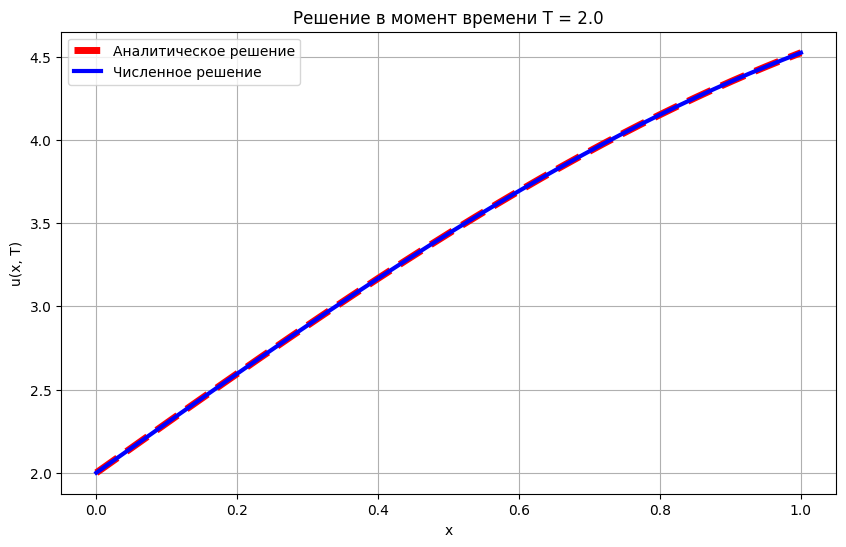

Максимальная ошибка: 2.75562905827087e-10


In [28]:
Mistakes= np.array([abs(mistakes[N-1, j]) for j in range (0, M, 100)])
X= np.array([x[j] for j in range (0, M, 100)])
order = abs((np.log10(Mistakes[1])-np.log10(Mistakes[-1]))/(np.log10(X[1])-np.log10(X[-1])))
print (np.log10(Mistakes[1]), np.log10(Mistakes[-1]), np.log10(X[1]), np.log10(X[-1]))

print(order)

plt.scatter(X, Mistakes)
plt.ylabel('Ошибка')
plt.xlabel('x')
plt.title(f'Порядок сходимости: {order:.2f}')
plt.grid(True)

plt.figure(figsize=(10, 6))

plt.plot(x, u_exact[N-1, :], label='Аналитическое решение', color='red', linestyle='--', linewidth=5)
plt.plot(x, u[N-1, :], label='Численное решение', color='blue', linestyle='-', linewidth=3)

plt.title(f'Решение в момент времени T = {T}')
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.legend()
plt.grid(True)


plt.show()


max_mistake = max(np.max(row) for row in mistakes)
print(f"Максимальная ошибка: {max_mistake}")